<a href="https://colab.research.google.com/github/adeemadil/Colab-Notebooks/blob/main/Machine_Learning_HW2_PCA%2C_Linear_%26_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import os
import csv
import math
import random
import operator
import pdb

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

!ls /gdrive/MyDrive/ML_HW2

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
digits.csv		      question-3-features-train.csv
question-2-features.csv       question-3-labels-test.csv
question-2-labels.csv	      question-3-labels-train.csv
question-3-features-test.csv


Reading/Loading Data

In [ ]:
root = '/gdrive/My Drive/ML_HW2'
digitsPath = os.path.join(root, 'digits.csv')
q2featuresPath = os.path.join(root, 'question-2-features.csv')
q2labelsPath = os.path.join(root, 'question-2-labels.csv')
q3features_TestPath = os.path.join(root, 'question-3-features-test.csv')
q3features_TrainPath = os.path.join(root, 'question-3-features-train.csv')
q3labels_TestPath = os.path.join(root, 'question-3-labels-test.csv')
q3labels_TrainPath = os.path.join(root, 'question-3-labels-train.csv')

In [ ]:
digits = pd.read_csv(digitsPath)
q2features = pd.read_csv(q2featuresPath, usecols=[0])
q2labels = pd.read_csv(q2labelsPath)
q3features_Test = pd.read_csv(q3features_TestPath)
q3features_Train = pd.read_csv(q3features_TrainPath)
q3labels_Test = pd.read_csv(q3labels_TestPath)
q3labels_Train = pd.read_csv(q3labels_TrainPath)


### PCA & Digits

In [ ]:
digits

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Getting The Digits Labels and Featuers

In [ ]:
digitsLabels = digits.loc[:, 'label'].to_numpy()
digitsFeatures = digits.drop( columns=['label']).to_numpy()

In [ ]:
digitsLabels

array([7, 2, 1, ..., 4, 5, 6])

 *Mean Centering* and then *Applying PCA*

In [ ]:
def pca_np(x):
  #centering data
  m = np.mean(x, axis =0)
  x_centered = x - m
  #calculating covariance matrix
  x_cov=np.cov(x_centered.T)
  #eigendecomposition
  eigenvals, eigenvecs = np.linalg.eig(x_cov)
  #sorting
  i= np.argsort(eigenvals)[::-1]
  eigenvecs = eigenvecs[:,i]
  eigenvals= eigenvals[i]
  #returning the eigenvalues, eigenvectors and means
  return(eigenvals, eigenvecs, m)

In [ ]:
digits_evals, digits_evecs, digits_mean = pca_np(digitsFeatures)
print("eigenvalues:", digits_evals)
print("eigenvectors:", digits_evecs)

eigenvalues: [ 3.45318199e+05  2.59288995e+05  2.11037325e+05  1.86474205e+05
  1.72914015e+05  1.45939061e+05  1.13806359e+05  1.01395541e+05
  9.38197793e+04  7.82917509e+04  7.33378520e+04  7.20079843e+04
  5.93156843e+04  5.79361423e+04  5.41666424e+04  5.13651315e+04
  4.47645548e+04  4.39383827e+04  4.05583243e+04  3.94647761e+04
  3.66503822e+04  3.53020611e+04  3.36708513e+04  3.09953841e+04
  3.05267175e+04  2.84076542e+04  2.74855824e+04  2.63203244e+04
  2.46595169e+04  2.36196125e+04  2.23097970e+04  2.15542077e+04
  2.02869008e+04  1.99938987e+04  1.87215474e+04  1.86156102e+04
  1.74329173e+04  1.65351701e+04  1.58149933e+04  1.55179396e+04
  1.50197483e+04  1.45845466e+04  1.41927497e+04  1.33908449e+04
  1.29993932e+04  1.27319974e+04  1.23135178e+04  1.14007748e+04
  1.12319891e+04  1.07173884e+04  1.04503200e+04  1.02361183e+04
  9.91470749e+03  9.57842240e+03  9.38319576e+03  9.03758259e+03
  8.76256417e+03  8.69558960e+03  8.40479598e+03  8.29799761e+03
  8.05459523

[0.10047663 0.07544487 0.06140516 0.05425807 0.05031249 0.04246363
 0.03311404 0.02950288 0.02729858 0.02278041]


Text(0.5, 0, 'Principal Components')

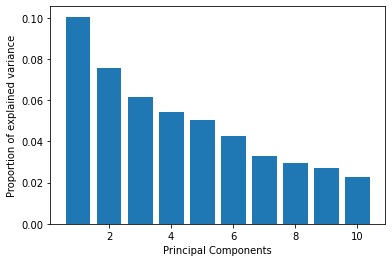

In [ ]:
k = 10
exp_var = digits_evals[:k]/sum(digits_evals)
print(exp_var)
#plot % of variance explained
plt.bar(range(1,k+1),exp_var)
plt.ylabel('Proportion of explained variance')
plt.xlabel('Principal Components')

In [ ]:
from numpy import mean,cov,cumsum,dot,linalg,size,flipud

def princomp(A,numpc=0):
  # computing eigenvalues and eigenvectors of covariance matrix
  M = (A-mean(A.T,axis=1)).T # subtract the mean (along columns)
  [latent,coeff] = linalg.eig(cov(M))
  p = size(coeff,axis=1)
  idx = np.argsort(latent) # sorting the eigenvalues
  idx = idx[::-1]       # in ascending order
  # sorting eigenvectors according to the sorted eigenvalues
  coeff = coeff[:,idx]
  latent = latent[idx] # sorting eigenvalues

  if numpc < p and numpc >= 0:
    coeff = coeff[:,range(numpc)] # cutting some PCs if needed
  score = dot(coeff.T,M) # projection of the data in the new space

  # exp_var = latent[:numpc]/sum(latent)
  exp_var= (latent[:numpc] / np.sum(latent))

  return coeff, score, latent, exp_var

the Principal Variance explained:
[0.10047663 0.07544487 0.06140516 0.05425807 0.05031249 0.04246363
 0.03311404 0.02950288 0.02729858 0.02278041]


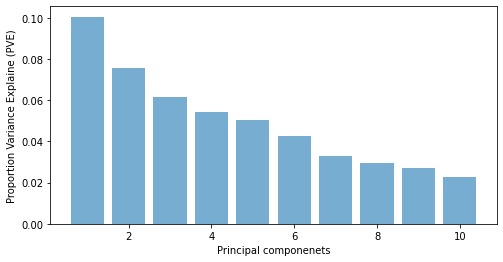

In [ ]:
num_components = 10
coeff, score, latent, pve = princomp(digitsFeatures,num_components)

print('the Principal Variance explained:')
print( pve)

plt.figure(figsize=(8,4))
plt.bar(range(1, num_components+1), pve, alpha=0.6)
plt.xlabel('Principal componenets')
plt.ylabel('Proportion Variance Explaine (PVE)')

Ar = dot(coeff,score).T+mean(digitsFeatures,axis=0) # image reconstruction

Text(0.5, 1.0, 'Image Reconstruction with 10 principal component')

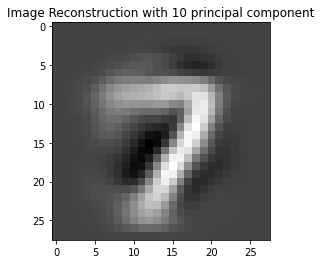

In [ ]:
#Reshpe each Principal Component, change the num_componenets value above and run this cell again & again if necessary
plt.imshow( np.reshape(Ar[:1], (28,28)), 'gray')
plt.title('Image Reconstruction with 10 principal component')

**Plotting k vs PVE , with k = {8,16,32,64,128,256}**

In [ ]:
# Calculating Proportional Explained Variance
p_ve = []

#Eigen values when k = 8
eig_vectors, score, eig_values8, pve1 = princomp(digitsFeatures,8)

#Eigen values when k = 16
eig_vectors, score, eig_values16, pve2 = princomp(digitsFeatures,16)
#Eigen values when k = 32
eig_vectors, score, eig_values32, pve3 = princomp(digitsFeatures,32)
#Eigen values when k = 64
eig_vectors, score, eig_values64, pve4 = princomp(digitsFeatures,64)
#Eigen values when k = 128
eig_vectors, score, eig_values128, pve5 = princomp(digitsFeatures,128)
#Eigen values when k = 256
eig_vectors, score, eig_values256, pve6 = princomp(digitsFeatures,256)


p_ve.append(pve1)
p_ve.append(pve2)
p_ve.append(pve3)
p_ve.append(pve4)
p_ve.append(pve5)
p_ve.append(pve6)


In [ ]:
#Cumulative sum for the PVE
explained_variance =[]
explained_variance=(eig_values[:num_components] / np.sum(eig_values))

NameError: ignored

In [ ]:
pveVals = []
for i in range(0,6):
  pveVals.append(sum(p_ve[i]))

In [ ]:
fig = plt.figure(figsize=(8,5))
plt.plot(k_components, pveVals, 'ro-', linewidth=2)
plt.title('k vs PVE ')
plt.xlabel('k - principal components')
plt.ylabel('Cumulative PVE')
leg = plt.legend(['Eigenvalues from SVD'], loc='best', borderpad=0.3, 
                 shadow=False, prop=matplotlib.font_manager.FontProperties(size='small'),
                 markerscale=0.4)
leg.get_frame().set_alpha(0.4)

*Reconstruction of **Digit( 7 )**, with k = {1,3,5,10,50,100,200,300}*

In [ ]:
#Eigen values when k = 1; 3; 5; 10; 50; 100; 200; 300.
k=300
eig_vectors, score, eig_values8, pve1 = princomp(digitsFeatures,k)
# image reconstruction
Ar = dot(eig_vectors,score).T+mean(digitsFeatures,axis=0)
#Reshpe each Principal Component,
plt.imshow( np.reshape(Ar[:1], (28,28)), 'gray')
plt.title('Image Reconstruction with k = 300 principal component')

# Linear & Polynomial Regression


Streaming output truncated to the last 5000 lines.
 [9.14079767e+09]
 [6.03001876e+11]
 [5.95447535e+09]
 [1.19051268e+09]
 [6.92694378e+10]
 [6.37547920e+10]
 [3.24114397e+10]
 [1.08823147e+09]
 [1.76853230e+09]
 [3.36038251e+07]
 [1.30314000e+11]
 [2.86485354e+10]
 [4.96402660e+10]
 [1.52287314e+11]
 [4.70043187e+09]
 [2.64510038e+07]
 [2.87036000e+10]
 [1.09314985e+10]
 [7.31526498e+09]
 [1.09075379e+10]
 [8.27622757e+09]
 [3.15455714e+10]
 [1.78142281e+08]
 [1.00240903e+11]
 [1.98312385e+10]
 [4.74461785e+05]
 [8.19415957e+09]
 [3.32539274e+07]
 [2.89842745e+10]
 [2.02819394e+10]
 [6.58041564e+09]
 [6.39874207e+08]
 [3.35899650e+10]
 [4.25403965e+10]
 [5.79503308e+10]
 [6.21139401e+10]
 [3.53952871e+11]
 [3.11900478e+09]
 [7.35209432e+10]
 [4.82063607e+10]
 [3.55244549e+10]
 [1.09257044e+11]
 [8.33496183e+08]
 [3.82486530e+10]
 [1.10994009e+11]
 [7.31072348e+10]
 [2.10493311e+09]
 [3.22967651e+11]
 [5.04189657e+10]
 [1.12415606e+10]
 [1.56925649e+03]
 [7.76012375e+09]
 [5.96553634e

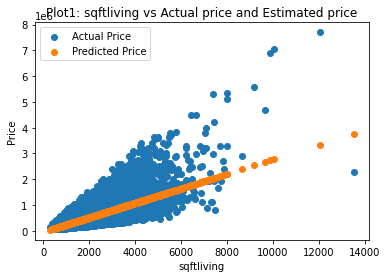

Streaming output truncated to the last 5000 lines.
 [3.26526490e+09]
 [3.53162636e+11]
 [7.33479690e+08]
 [9.08150332e+06]
 [4.79918987e+10]
 [4.32953589e+10]
 [4.94510589e+09]
 [1.81785043e+09]
 [2.28147798e+08]
 [2.93350677e+09]
 [9.66169015e+10]
 [1.45342993e+10]
 [5.89435565e+10]
 [1.81687817e+11]
 [1.40938225e+10]
 [9.32388315e+09]
 [1.43903446e+10]
 [5.33828282e+09]
 [6.14061627e+09]
 [6.27972644e+09]
 [1.76842012e+10]
 [3.23532801e+10]
 [3.94333574e+09]
 [7.49282283e+10]
 [2.44706007e+10]
 [1.17666119e+09]
 [1.63122588e+09]
 [1.45151158e+08]
 [2.07074004e+10]
 [9.97511436e+09]
 [4.14288391e+08]
 [1.27159069e+09]
 [7.63689652e+09]
 [2.54294405e+10]
 [4.29124644e+10]
 [5.82893537e+10]
 [3.59554103e+11]
 [9.25137351e+07]
 [5.57380271e+10]
 [2.97728496e+10]
 [3.28740719e+10]
 [7.91388322e+10]
 [2.03533782e+08]
 [2.78431146e+10]
 [9.22953676e+10]
 [5.11783113e+10]
 [5.12892638e+09]
 [3.59103052e+11]
 [4.39384210e+10]
 [4.09830970e+09]
 [2.93907913e+08]
 [4.55797627e+09]
 [2.42637006e

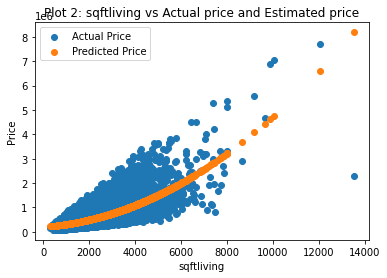

In [ ]:
import os
import csv
import math
import random
import operator
import pdb

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

## ---------- 2.1 ----------##
featuresq2 = pd.read_csv(q2featuresPath)
X = np.matrix(featuresq2)
res = np.dot(X.T,X)
rank = np.linalg.matrix_rank(res)
print(rank)


## ---------- 2.3 ----------##
q2features = pd.read_csv(q2featuresPath, usecols=[0])
q2labels = pd.read_csv(q2labelsPath)


featuresTransposed = q2features.to_numpy()
labels = q2labels.to_numpy()
features = featuresTransposed.T



np.set_printoptions(threshold=np.inf)

XMatrixTransposed = np.matrix(np.vstack((np.ones_like(features),features)))
yMatrix = np.matrix(labels)
XMatrix = XMatrixTransposed.T

XX_T = np.matmul(XMatrix.T, XMatrixTransposed.T)
invrs = np.linalg.inv( XX_T)

temp = invrs @ XMatrix.T
beta = temp @ yMatrix
y_hat = np.dot( XMatrix,beta)
y_hat_array = np.array(y_hat)

MSE = np.square( np.abs(labels - y_hat))
print(beta)
print(MSE)

plt.title('Plot1: sqftliving vs Actual price and Estimated price')
plt.xlabel('sqftliving')
plt.ylabel('Price')
plt.scatter(features.T ,labels)
plt.scatter(features.T,y_hat_array)
#plt.axis('equal')
plt.legend(['Actual Price','Predicted Price'])
plt.show()

### ------ 2.4 -------########
XMatrixTransposed = np.matrix(np.vstack( (np.ones_like(features),features, np.square(features))))
yMatrix = np.matrix(labels)
XMatrix = XMatrixTransposed.T

XX_T = np.matmul(XMatrix.T, XMatrixTransposed.T)
invrs = np.linalg.inv( XX_T)

temp = invrs @ XMatrix.T
beta = temp @ yMatrix
y_hat = np.dot( XMatrix,beta)
y_hat_array = np.array(y_hat)

MSE = np.square( np.abs(labels - y_hat))
print(beta)
print(MSE)

plt.scatter(features.T ,labels)
plt.scatter(features.T,y_hat_array)
#plt.axis('equal')
plt.legend(['Actual Price','Predicted Price'])
plt.title('Plot 2: sqftliving vs Actual price and Estimated price')
plt.xlabel('sqftliving')
plt.ylabel('Price')
plt.show()


# Logistic Regression

In [ ]:
featuresTrain = q3features_Train
featuresTest = q3features_Test
labelsTest = q3labels_Test.to_numpy()
labelsTrain = q3labels_Train.to_numpy()

Normalize the feature 29 (Amount)

In [ ]:
column = 'Amount'
df_max_scaled = featuresTrain.copy()
# df_max_scaled[column] = df_max_scaled[column] /df_max_scaled[column].abs().max()
df_max_scaled[column] = (df_max_scaled[column] - df_max_scaled[column].mean()) / df_max_scaled[column].std()

In [ ]:
df_max_scaledTest = featuresTest.copy()
df_max_scaledTest[column] = (df_max_scaledTest[column] - df_max_scaledTest[column].mean()) / df_max_scaledTest[column].std()

In [ ]:
XTrain =df_max_scaled.to_numpy()

In [ ]:
XTest = df_max_scaledTest.to_numpy()

full batch gradient ascent algorithm to train your logistic model

In [ ]:
#helper Sigmoid function
def sigmoid( X):
  return 1/ (1 + np.exp(-X))

In [ ]:
#fit function
def fit( X, Y):
  #Init parameters
  learningRate = 0.001
  n_itrs = 1000
  n_samples, n_features = X.shape
  bias = 0
  weights = np.zeros(n_features)

  #Gradient Ascent
  for _ in range(n_itrs):
    linearModel = np.dot( X, weights) + bias
    y_predicted = 1/ (1 + np.exp(linearModel))

    #update weights and bias
    dw = (1 / n_samples) * np.dot(X.T, y_predicted - Y)
    db = (1/ n_samples) * np.sum(y_predicted - Y)

    weights += learningRate * dw
    bias += learningRate * db
    return weights, bias

In [ ]:
#predict function
def predict1( X, weights, bias):
  linearModel = np.dot( X, weights) + bias
  y_predicted = 1/ (1 + np.exp(linearModel))
  y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
  return np.array(y_predicted_cls)

In [ ]:
#helper function for printing a Confusion Matrix
def printConfusionMatrix( actual, predicted):
  data = {'y_Actual':    actual,
        'y_Predicted': predicted
        }

  df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])

  confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
  return confusion_matrix

In [ ]:
#accuracy function
def accuracy( y_true, y_pred):
  return np.sum(y_true == y_pred) / len(y_true)

In [ ]:
weights1, bias1 = fit( XTrain, labelsTrain.ravel())

In [ ]:
predictions = predict1(XTest, weights1, bias1)

In [ ]:
print("LR classification accuracy:", accuracy(labelsTest.ravel(), predictions))

LR classification accuracy: 0.965


In [ ]:
printConfusionMatrix( labelsTest.ravel(), predictions)

Predicted,0,1
Actual,,
0,1069,33
1,9,89


In [ ]:
def compute_tp_tn_fn_fp(y_act, y_pred):
  tp = sum((y_act ==1) & (y_pred == 1))
  tn = sum((y_act ==0) & (y_pred == 0))
  fn = sum((y_act ==1) & (y_pred == 0))
  fp = sum((y_act ==0) & (y_pred == 1))
  return tp, tn, fn, fp

def compute_precision(tp, fp):
  return (tp * 100)/ float(tp + fp)

In [ ]:
tp_lr, tn_lr, fn_lr, fp_lr = compute_tp_tn_fn_fp( labelsTest.ravel(), predictions)
print('TP for Logistic Regression : ', tp_lr)
print('TN for Logistic Regression : ', tn_lr)
print('FN for Logistic Regression : ', fn_lr)
print('FP for Logistic Regression : ', fp_lr)

TP for Logistic Regression :  89
TN for Logistic Regression :  1069
FN for Logistic Regression :  9
FP for Logistic Regression :  33


In [ ]:
print('Precision for Logistic Regression : ', compute_precision( tp_lr, fp_lr))

Precision for Logistic Regression :  0.8348794063079777


In [ ]:
actualpos = np.count_nonzero(labelsTest == 1)
precision = (tp_lr/(tp_lr + fp_lr))
recall = (tp_lr/(tp_lr+fn_lr))
FPR =(fp_lr/(fp_lr+tn_lr))
F1 = (precision*recall)/(precision + recall)
F2 = (5*precision*recall)/(4*precision+recall)
FDR = (fp_lr/(fp_lr+tp_lr))
NPV = (tn_lr/(tn_lr+fn_lr))
print('Precision =',precision)
print('Recall =',recall)
print('Negative Predictive Value =',NPV)
print('False Positive Rate =',FPR)
print('False Discovery Rate =',FDR)
print('F1 =',F1)
print('F2=',F2)

Precision = 0.7295081967213115
Recall = 0.9081632653061225
Negative Predictive Value = 0.9916512059369202
False Positive Rate = 0.029945553539019964
False Discovery Rate = 0.27049180327868855
F1 = 0.40454545454545454
F2= 0.8657587548638132
